In [1]:
import pandas as pd
import numpy as np
import random
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [2]:
# Load dataset
data = pd.read_csv('dataset.csv')


In [3]:
# Rename columns
data.rename(columns={'Unnamed: 0': 'id', 'Title': 'name', 'Ingredients': 'ingredients',
                     'Instructions': 'steps', 'Image_Name': 'image'}, inplace=True)

In [4]:
# Pilih kolom yang relevan
new_data = data[['id', 'name', 'ingredients', 'steps', 'image']]

In [5]:
# **Tambahkan kolom rating dengan nilai random antara 1-5**
new_data['rating'] = np.random.randint(1, 6, size=len(new_data))  # Random rating dari 1 sampai 5

In [6]:
# **Tetapkan cluster berdasarkan nilai rating**
new_data['cluster'] = np.where(new_data['rating'] <= 3, 0, 1)  # 0 jika rating <= 3, 1 jika rating >= 4
new_data['cluster_label'] = new_data['cluster'].map({0: 'biasa saja', 1: 'favorit'})


In [7]:
# **Gunakan TF-IDF lebih optimal**
tfidf = TfidfVectorizer(stop_words='english', max_features=20000, ngram_range=(1, 3))
X_ingredients = tfidf.fit_transform(new_data['ingredients'].values.astype('U'))


In [8]:
# **Optimasi jumlah cluster menggunakan Elbow Method**
wcss = []
for i in range(5, 18):  # Uji cluster dari 5 hingga 18
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_ingredients)
    wcss.append(kmeans.inertia_)


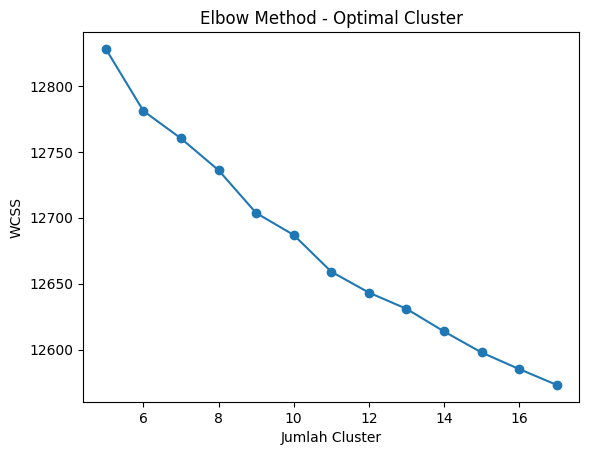

In [9]:
# Plot Elbow Method
plt.plot(range(5, 18), wcss, marker='o')
plt.xlabel("Jumlah Cluster")
plt.ylabel("WCSS")
plt.title("Elbow Method - Optimal Cluster")
plt.show()

In [10]:
# **Gunakan K-Means dengan cluster lebih optimal (12)**
optimal_clusters = 12
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
new_data['category_num'] = kmeans.fit_predict(X_ingredients)

In [11]:
# **Pemetaan kategori lebih rinci berdasarkan ingredients**
def categorize_food(ingredients):
    ingredients = ingredients.lower()
    
    # 🍖 Daging & Protein Hewani
    if any(item in ingredients for item in ['beef', 'lamb', 'pork', 'chicken', 'turkey', 'duck', 'bacon', 'sausage']):
        return "Meat-Based"
    elif any(item in ingredients for item in ['fish', 'shrimp', 'salmon', 'tuna', 'crab', 'mussels']):
        return "Seafood"
    
    # 🥦 Sayuran & Tanaman
    elif any(item in ingredients for item in ['spinach', 'kale', 'lettuce', 'broccoli', 'carrot', 'potato', 'tomato', 'cucumber', 'mushroom']):
        return "Vegetarian"

    # 🍚 Sumber Karbohidrat
    elif any(item in ingredients for item in ['rice', 'oats', 'quinoa', 'barley', 'flour', 'bread', 'pasta', 'tortilla', 'sweet potato']):
        return "Bakery"

    # 🍶 Produk Susu & Alternatifnya
    elif any(item in ingredients for item in ['milk', 'cheese', 'butter', 'yogurt', 'almond milk', 'soy milk']):
        return "Dairy-Based"

    # 🍯 Pemanis & Perasa
    elif any(item in ingredients for item in ['sugar', 'honey', 'maple syrup', 'stevia', 'salt', 'pepper', 'garlic', 'cinnamon', 'basil', 'oregano']):
        return "Seasoning & Sweetener"

    # 🍩 Dessert & Bahan Kue
    elif any(item in ingredients for item in ['chocolate', 'cocoa', 'vanilla', 'eggs', 'baking powder']):
        return "Dessert"
    
    # 🍕 Fusion / Italian
    elif any(item in ingredients for item in ['tomato', 'basil', 'mozzarella']):
        return "Italian"
    elif any(item in ingredients for item in ['cheese', 'fruit', 'puff pastry']):
        return "Fusion"

    else:
        return "Other"


In [12]:
new_data['category'] = new_data['ingredients'].apply(categorize_food)

In [18]:
# **Gunakan Naïve Bayes dengan smoothing alpha lebih tinggi**
model_category = MultinomialNB(alpha=0.5)
model_category.fit(X_ingredients, new_data['category_num'])

MultinomialNB(alpha=0.5)

In [19]:
# **Gunakan TF-IDF lebih kuat untuk rekomendasi nama**
cv = TfidfVectorizer(max_features=20000, stop_words='english', ngram_range=(1, 3))
X_name = cv.fit_transform(new_data['name'].values.astype('U'))

model_recommendation = MultinomialNB(alpha=0.5)
y = np.arange(len(new_data))
model_recommendation.fit(X_name, y)


MemoryError: Unable to allocate 1.36 GiB for an array with shape (13501, 13501) and data type int64